(32, 32, 3)


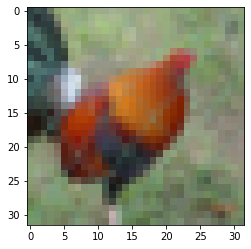

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimage
image = mpimage.imread('hen.png')
plt.imshow(image)
print(image.shape)


In [79]:
 #this is a helper function to make the reflecction 
def fun(img,i,j,k):                                                            
  i,j = abs(i-k+1),abs(j-k+1)
  W,H,C = img.shape

  if(i>=W):
    i = 2*W-i-2
  if(j>=H):
    j = 2*H-j-2
  
  return img[i][j]


In [80]:
# this function is for Reflecting the input image around the edges
def ref_pad(img,k):                                                             
  W,H,C = img.shape
  x,y,z = W+2*k-2,H+2*k-2,C                                                    
  A = np.zeros([x,y,z])

  for i in range(x):
    for j in range(y):
      A[i][j] = fun(img,i,j,k)                                                  
  return A 

In [81]:
#different non linear functions
def sigmoid(x):
  x = 1/(1+np.exp(-x))
  return x

def tanh(x):
  x = (np.exp(x)-np.exp(-x))//(np.exp(x)+np.exp(-x))
  return x

def relu(x):
  x = np.maximum(0,x)
  return x

def prelu(x):
  x = np.maximum(0.001*x,x)
  return x

# **1 question**

In [82]:
# defining a convolution
def convolution(img,tmp,stride,pad,fun): 
    #here we are flipping the kernel                                          
    kernel = np.flip(tmp,0)                                              
    n = tmp.shape[0]
    if pad == 1:
      img = ref_pad(img,n)
    m,n,o = img.shape
    a,b,c = tmp.shape
    k = stride
    x,y,z = ((m-a)//k)+1,((n-b)//k)+1,c
    img_filter = np.zeros([x,y,z])
    conv_img  = np.zeros([x,y])

    for t in range(o):
        for i in range(x):
          for j in range(y):
            s = 0
            for p in range(a):
              for q in range(b):
                  s += img[(i*k)+p][(j*k)+q][t] * tmp[p][q][t]                          
            img_filter[i][j][t] = s
            
    for i in range(0,x):                                                               
      for j in range(0,y):        
        for k in range (0,z):
          conv_img[i][j] += img_filter[i][j][k]
    conv_img = fun(conv_img)
    return conv_img

In [83]:
#ridge kernel
a = [[-1,0,0],[-1,5,-1],[0,-1,0]]                                               
r_kernal = np.stack((a,a,a),2)
print(r_kernal.shape)

(3, 3, 3)


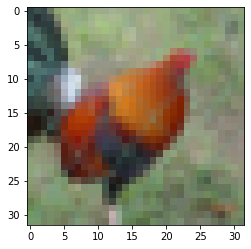

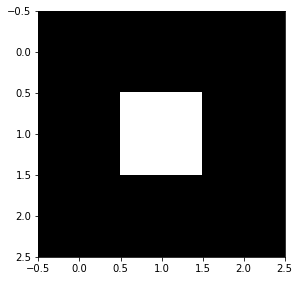

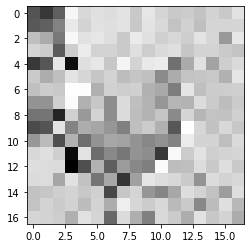

In [84]:
img = convolution(image,r_kernal,2,1,sigmoid)                                 
# ploting input image
plt.imshow(image)                                                              
plt.show()

plt.figure(figsize = (15,15))
plt.subplot(1,3,3)
#ploting kernal
plt.imshow(r_kernal/np.amax(r_kernal),cmap = 'gray')                      
plt.show()

plt.imshow(img,cmap = 'gray')                                                   
plt.show()

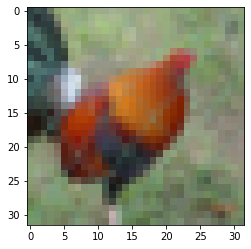

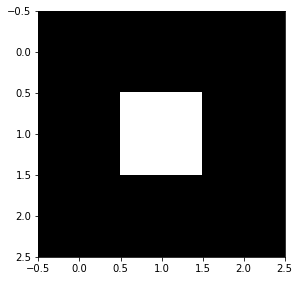

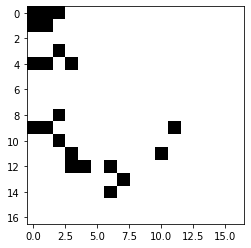

In [85]:
img = convolution(image,r_kernal,2,1,tanh)
# ploting input image
plt.imshow(image)                                                               
plt.show()

plt.figure(figsize = (15,15))
plt.subplot(1,3,3)
#ploting kernal
plt.imshow(r_kernal/np.amax(r_kernal),cmap = 'gray')                      
plt.show()

plt.imshow(img,cmap = 'gray')                                                   
plt.show()

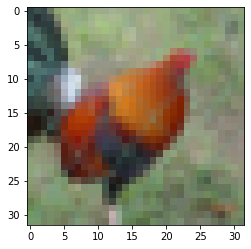

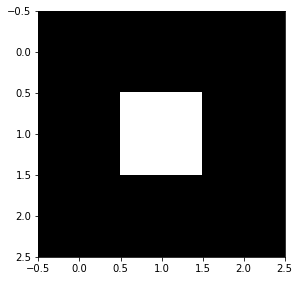

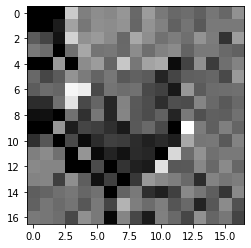

In [86]:
img = convolution(image,r_kernal,2,1,relu)
# ploting input image
plt.imshow(image)                                                               
plt.show()

plt.figure(figsize = (15,15))
plt.subplot(1,3,3)
#ploting kernal
plt.imshow(r_kernal/np.amax(r_kernal),cmap = 'gray')                      
plt.show()

plt.imshow(img/255,cmap = 'gray')                                              

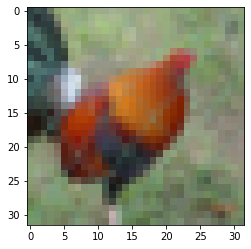

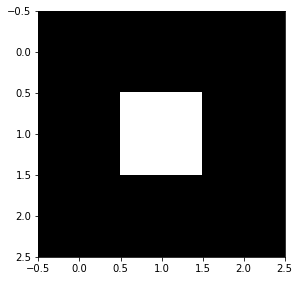

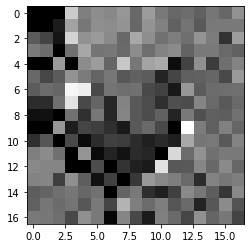

In [87]:
img = convolution(image,r_kernal,2,1,prelu)
# ploting input image
plt.imshow(image)                                                               
plt.show()

plt.figure(figsize = (15,15))
plt.subplot(1,3,3)

# ploting kernel image
plt.imshow(r_kernal/np.amax(r_kernal),cmap = 'gray')                      
plt.show()

plt.imshow(img/255,cmap = 'gray')                                               

# **2 question: Pooling function**

In [88]:
# this function will return the window size matrix
def get_pools(img: np.array, pool_size: int, stride: int) -> np.array:          
    pools = []
    for i in np.arange(img.shape[0], step=stride):
        for j in np.arange(img.shape[0], step=stride):
            mat = img[i:i+pool_size, j:j+pool_size]
            if mat.shape == (pool_size, pool_size):
                pools.append(mat)

    return np.array(pools)

In [89]:
#max pooling
def max_pooling(pools: np.array) -> np.array:                                   

  n = pools.shape[0]
  m,n = (int(np.sqrt(n)), int(np.sqrt(n)))
  pooled = []
  for pool in pools:
      pooled.append(np.max(pool))
      
  return np.array(pooled).reshape((m,n))

In [90]:
#avarage pooling
def avg_pooling(pools: np.array) -> np.array:

  n = pools.shape[0]
  m,n = (int(np.sqrt(n)), int(np.sqrt(n)))
  pooled = []
  for pool in pools:
      pooled.append(np.mean(pool))
      
  return np.array(pooled).reshape((m,n))

In [91]:
#pooling function
def pooling(img,pool,window,stride):                                            
  x = get_pools(img,window,stride)
  tgt_img = pool(x)

  return tgt_img



In [92]:
pool_act_map = pooling(img,max_pooling,2,2)                                     

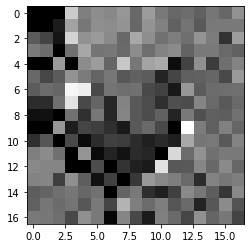

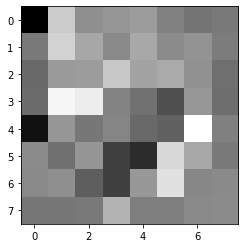

In [93]:
#input image
plt.imshow(img,cmap = "gray")                                                  
plt.show()

#output image
plt.imshow(pool_act_map,cmap = "gray")
plt.show()                                                                       

# **3 question: Convolution layer function**

In [94]:
#convolution layer function
def conv_layer(img,filter_kernels,stride,pad,fun):                             
  n = len(filter_kernels)
  A = []
  
  for i in range(n):
    A.append(convolution(img,filter_kernels[i],stride,pad,fun))

  A = np.stack(A,2)
  return A



def kernel(x,y,z,n):
  return np.random.rand(n,x,y,z)                                                


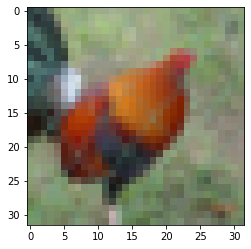

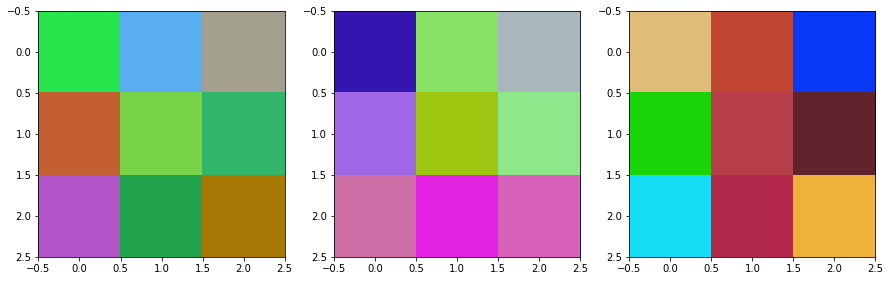

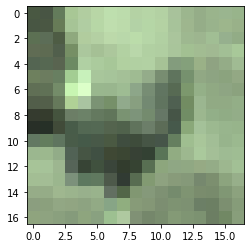

In [95]:
#plotting kernals
filter_kernels = kernel(3,3,3,3)
m = np.amax(conv_layer(image,filter_kernels,2,1,relu))
conv_lay_img = conv_layer(image,filter_kernels,2,1,relu)/m

plt.imshow(image)
plt.show()

plt.figure(figsize = (15,15))                                                    
for i in range(3):
  plt.subplot(1,3,i+1)
  plt.imshow(filter_kernels[i])
plt.show()

plt.imshow(conv_lay_img)
plt.show()

# **4 question Pooling layer function:**

In [96]:
def pool_layer(img,pool,window,stride):
  
  tgt_img = []

  for i in range(3):   
     x = get_pools(img[:,:,i],window,stride)
     tgt_img.append(pool(x))
  
  tgt_img = np.stack(tgt_img,2)
  return tgt_img



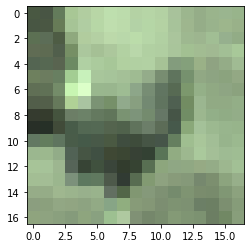

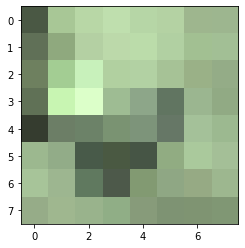

In [97]:
pool_lay_img = pool_layer(conv_lay_img,max_pooling,2,2)

#plot input
plt.imshow(conv_lay_img)                                                        
plt.show()

#plot output
plt.imshow(pool_lay_img)
plt.show()                                                                      

# **5 question Flattening function:**

In [98]:
def Flattening(img,d):
  n = len(pool_lay_img.flatten())
  A = pool_lay_img.flatten()

  weigh_mat = np.random.rand(d,n)

  B = np.dot(weigh_mat,A)

  return B


In [99]:
vector = Flattening(pool_lay_img,100)                                           

In [100]:
def softmax(vec):
  return np.exp(vec)/np.sum(np.exp(vec))

# **6 question Multilayer Perceptron (MLP) function**

In [101]:
def MLP(inp_vec,n,size,fun,size_out,soft_max):
  A = inp_vec
  for i in range(n):
    weigh_mat = np.random.rand(size[i+1],size[i])
    A = np.dot(weigh_mat,A)
    A = fun(A)

  weigh_mat = np.random.rand(size_out,size[n])
  A = np.dot(weigh_mat,A)

  if soft_max == 1:
    A = softmax(A)

  return A


In [102]:
#size is list of hidden layer lengths
size = np.array([len(vector),25])                                               
MLP(vector,1,size,sigmoid,20,0)


array([12.22178622, 13.53183909, 11.21053195, 14.14735819, 12.1996145 ,
       11.52452846, 11.70681222, 13.46932604, 12.62763385, 10.97760305,
       11.54987229, 12.59654563, 15.05402434, 12.39450476, 14.70788198,
       12.1534767 , 13.24799832, 14.03097546, 13.48583954, 12.6586846 ])

In [103]:
#importing cifar10 from keras
from keras.datasets import cifar10                                              
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [104]:
def cifar(label,n):
    num = 0
    i = 0
    cifar_img = []
    while(num<n):
        if(y_train[i][0] == label):
            cifar_img.append(x_train[i])
            num +=1
        i+=1
        
    return cifar_img

# **7 question Feed-forward path**

In [105]:
def feed_forward(img):

  filter_kernels = kernel(3,3,3,16)
  conv_lay1 = conv_layer(img,filter_kernels,1,1,sigmoid)

  pool_img1 = pool_layer(conv_lay1,max_pooling,2,2)

  filter_kernels = kernel(3,3,conv_lay1.shape[-1],8)
  conv_lay2 = conv_layer(pool_img1,filter_kernels,1,0,sigmoid)

  pool_img2 = pool_layer(conv_lay2,max_pooling,2,2)

  pool_img3 = pool_layer(conv_lay2,avg_pooling,2,2)
  vector = Flattening(pool_img3,d = 50)

  size = np.array([25])
  size = np.insert(size,0,len(vector))
  fin_vector = MLP(vector,1,size,sigmoid,10,0)

  return fin_vector





In [106]:
feed_forward(image)
#here we can see this  output is a vector                                                               

array([12.37422675, 13.62073292, 11.6906107 , 11.45431102, 11.15257576,
       12.44187978,  9.66884072, 13.25186067, 10.53782538, 12.41216938])

# **8 question**

In [107]:
import matplotlib.pyplot as plt
for i in range(10):
  x = np.arange(0, 10) 
  y = feed_forward(cifar(i,1)[0])
  print(y)
  # plt.plot(x,y)
  # plt.show()

  
  

[12.32706094 13.09325514 14.35214614 12.1604836  12.84459227 10.8405831
 14.69951924 13.25414151 13.58241271 11.94383484]
[13.4652203  11.45787243 12.14084483 13.62643789 12.87912296 12.86230254
 11.96418805 13.9781806  11.24593273 12.84773508]
[12.53975398 10.99437604 13.72615377 12.58951576 10.89548301 13.16898398
  9.9320145   9.35961418 14.49649687  9.7971019 ]
[ 8.37115922 14.5801338  13.61979324 13.862172   16.04888112 13.51251799
 12.4131527  11.95603258 14.44654498 12.81293505]
[10.70236732 10.25644101 13.36946777 11.86106843 13.46958683 12.45566284
 13.43510593 12.29279806 14.53011998 11.90369689]
[ 9.00554974  9.77453382 12.49241754 11.40867635 11.17912285  9.4492711
 12.72030629 11.40893551 13.53218363 13.48490978]
[14.5686763  12.28261607 11.71916674 14.59377859 15.11102684 13.89643881
 11.71803373 13.29908573 13.64924666 13.80272567]
[11.60489691 16.94872595 13.04258432 13.07526572 12.76052792 15.49862677
 11.99226588 11.46386171 10.9612023  12.35799699]
[12.73781892 12.68

# **8b Question**

In [108]:
def plot_(img):
  filter_kernels = kernel(3,3,3,16)
  conv_lay1 = conv_layer(img,filter_kernels,1,0,sigmoid)
  pool_img1 = pool_layer(conv_lay1,max_pooling,2,2)
  vector = Flattening(pool_img1,d = 10)
  return vector


In [109]:
X = []
Y = []
for i in range(10):
  x,y,z = cifar(i,3)
  Y.append(i)
  Y.append(i)
  Y.append(i)
  X.append(plot_(x))
  X.append(plot_(y))
  X.append(plot_(z))


In [110]:
#X is a 2d vectors of cifar images 10 classes each of 3 images
X = np.array(X)                                                                 
Y = np.array(Y)

In [111]:
len(X)
print(X.shape)

(30, 10)


In [112]:
from sklearn.decomposition import PCA
import numpy as np
pca=PCA(n_components=2)
pca.fit(X)
result=pca.transform(X)

print(result)


[[-3.10345318 -4.71634552]
 [ 1.72211568  2.25766358]
 [-3.61709272  0.51330436]
 [-4.63726959 -1.89832774]
 [ 0.28065109 -1.66388459]
 [ 3.03074824 -2.73104877]
 [ 4.82479372  3.61397936]
 [ 4.47106752 -1.36155906]
 [-2.1863503   5.42366291]
 [ 4.33314251 -2.72864972]
 [-1.03206347 -1.99150424]
 [ 5.0322166  -4.9253611 ]
 [-1.7839324  -1.31804477]
 [-5.12780269 -0.09012947]
 [-3.82654575 -0.23541819]
 [ 2.34831148  0.94451979]
 [-0.21478413 -1.61842885]
 [-1.96007289  4.72824683]
 [-2.23617842  0.327753  ]
 [-4.68047649 -2.40918366]
 [-3.56910261 -2.67553805]
 [-2.24528614  0.11262349]
 [-0.18784153  1.12486194]
 [ 8.82755778  4.27060517]
 [-0.64290188  6.30237377]
 [ 3.4675805   3.04672169]
 [-1.90473602  3.1326717 ]
 [-1.35365172  1.40938481]
 [ 6.09708167 -5.70528382]
 [-0.12572486 -1.13966484]]


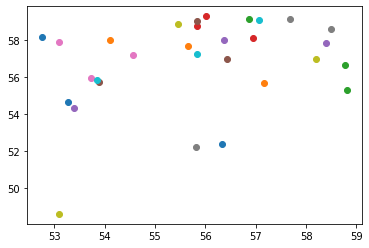

In [113]:
for i in range(30):
  plt.scatter(X[i,0],X[i,1])


In [114]:
print("No,a randomly initialized network does not show any discriminability, since it does not undergone any training")

No,a randomly initialized network does not show any discriminability, since it does not undergone any training
